# Naive Bayes
In this file we train a naive Bayes classifier on the MNIST dataset. 

## The Classifier
Suppose we have a binary vector $x$ and we want to predict the most likely label $\hat{y}$. We want 

\begin{equation*}
\hat{y} = \mathrm{argmax}_y p(y\mid x)
\end{equation*}

We rewrite this as 

\begin{equation*}
\hat{y} = \mathrm{argmax}_y p(y\mid x) = \mathrm{argmax}_y\frac{p(x\mid y)p(y)}{p(x)} \propto p(x\mid y)p(y)
\end{equation*}

The crucial assumption we make is that each component of $x$ is conditionally independent given $y$ (which is not realistic at all). Thus 

\begin{equation*}
\hat{y} = \mathrm{argmax}_y \prod_{i=1}^n p(x_i\mid y)p(y). 
\end{equation*}

Of course we can easily estimate $p(x_i\mid y)$ and $p(y)$ from our training data. 

To avoid numerical underflow, we instead compute 
\begin{equation*}
\hat{y} = \mathrm{argmax}_y \sum_{i=1}^n\log p(x_i\mid y) + \log p(y)
\end{equation*}

## Implementation

In [3]:
import math
import torch
import torchvision
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [5]:
# We first define a function that transforms each data point from
# a 28x28 array to a dimension 784 vector. 
# Then we download the data and apply the transformation. 

data_transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor()])

mnist_train = torchvision.datasets.MNIST(
    root='./data', train=True, transform=data_transform, 
    download=True)
mnist_train = torchvision.datasets.MNIST(
    root='./data', train=False, transform=data_transform, 
    download=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


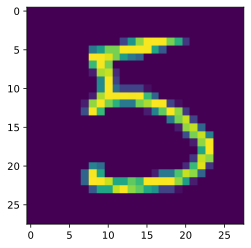

In [29]:
# Example data points
images = torch.stack([mnist_train[i][0] for i in range(10, 38)], 
                    dim=1).squeeze(0)
labels = torch.tensor([mnist_train[i][1] for i in range(10, 38)])

# Figure out how to display all of them. 
plt.imshow(images[5])